In [58]:
from symfit import variables, Parameter, ODEModel, D, Fit, parameters
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\symfit\core\fit.py:1046: RuntimeWarning: divide by zero encountered in true_divide
  W = 1/sigma**2/s_sq[:, np.newaxis]


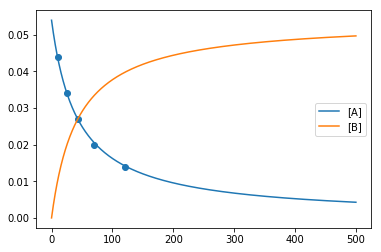

In [59]:
tdata = np.array([10, 26, 44, 70, 120])
adata = 10e-4 * np.array([44, 34, 27, 20, 14])
a, b, t = variables('a, b, t')

k = Parameter('k', 0.1)
a0 = 54 * 10e-4

model_dict = {
    D(a, t): - k * a**2,
    D(b, t): k * a**2,
}

ode_model = ODEModel(model_dict, initial={t: 0.0, a: a0, b: 0.0})

fit = Fit(ode_model, t=tdata, a=adata, b=None)
fit_result = fit.execute()

tvec = np.linspace(0, 500, 1000)

A, B = ode_model(t=tvec, **fit_result.params)
plt.plot(tvec, A, label='[A]')
plt.plot(tvec, B, label='[B]')
plt.scatter(tdata, adata)
plt.legend()
plt.show()


In [63]:
AA, B, AAB, BAAB, t = variables('AA, B, AAB, BAAB, t')
k, p, l, m = parameters('k, p, l, m')

AA_0 = 10  # Some made up initial amound of [AA]
B = AA_0 - BAAB + AA  # [B] is not independent.

model_dict = {
    D(BAAB, t): l * AAB * B - m * BAAB,
    D(AAB, t): k * A * B - p * AAB - l * AAB * B + m * BAAB,
    D(A, t): - k * A * B + p * AAB,
}

model = ODEModel(model_dict, initial={t: 0.0, AA: AA_0, AAB: 0.0, BAAB: 0.0})

# Generate some data
tdata = np.linspace(0, 3, 1000)

# Eval the normal way.
AA, AAB, BAAB = model(t=tdata, k=0.1, l=0.2, m=0.3, p=0.3)

plt.plot(tdata, AA, color='red', label='[AA]')
plt.plot(tdata, AAB, color='blue', label='[AAB]')
plt.plot(tdata, BAAB, color='green', label='[BAAB]')
plt.plot(tdata, B(BAAB=BAAB, AA=AA), color='pink', label='[B]')
# plt.plot(tdata, AA + AAB + BAAB, color='black', label='total')
plt.legend()
plt.show()

IndexError: list index out of range